# Multilinear & polynomial regression

In this lesson, I adress the main drawbacks of simple linear regression: use of only one predictor, and linearity...

## Multilinear regression (more than one predictor)
I have introduced simple linear regression, but this parametric model uses only one predictor. It is the case that more than two predictors (independent variables) might be necessary to model true relationship. For instance perceived temperature depends on real temperatuture and air humidity, requiring two predictors for prediction. 

Assuming that there are $p$-preditors: $X_1$, ..., $X_n$, we also have $p+1$ coefficients to approximate: $\beta_0$, $\beta_1$, ..., $\beta_p$. Then the statistical model is given as follows:
$$
y_i = \beta_0 + \beta_1 X_{1,i} + \ldots + \beta_p X_{p,i} + \epsilon,
$$
where $y_i$ is $i \text{th}$ observation, out of $n $, of dependent variable, and $\epsilon$ is irreducible error. The equation can be organized more succinctly using matrix $X $, and vector of $\beta \text{s}$:
$$
y_i = \begin{bmatrix} 1 & X_{1,1} &\ldots &X_{1, p} \\
1 & X_{2,1}& \ldots & X_{2, p} \\
\vdots & \vdots & \ldots & \vdots \\
1 & X_{n,1}& \ldots & X_{n, p} \\  \end{bmatrix}_{i,\nu} \beta_{\nu} + \epsilon
$$

Subsequently, the coeffitients have to be estimated. To that end, we use ``RSS`` (residual sums of squares) as before. Using Einstein's summation convention we have:

$$
0 = \frac{d\text{RSS}}{d\beta_\nu} = \frac{d}{d\beta_\nu} \left[ (y_i - X_{i,\omega} \beta ^{\omega})(y^i - X^{i, \mu} \beta_{\mu}) \right]\\
= -2 (y_i - X_{i,\omega} \beta ^{\omega})X^{i, \nu}
$$

Rearranging and expressing everything in terms of vectros and matrices we have

$$X^T y = X^T X \beta \\ \beta = (X^T X)^{-1} X^T y$$

### Comparing simple linear and multilinear regression

Import libraries.

In [97]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Import statistical models
from sklearn.linear_model import LinearRegression

# Import function that splits the data
from sklearn.model_selection import train_test_split

# Import MSE metric
from sklearn.metrics import mean_squared_error 

Read data.

In [98]:
df = pd.read_csv("../data/Credit.csv")

X_multi = df[['Income', 'Education']]

y = df['Limit']
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


Now, we split data into training and testing sets with ``random_state=1``. We are making the split to compare the models on previously unseen data.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=1)

Now, we train both simple and multi-linear regression.

In [100]:
model_simple = LinearRegression().fit(X_train[['Income']], y_train)

model_multi = LinearRegression().fit(X_train, y_train)

y_simple_pred = model_simple.predict(X_test[['Income']])
y_multi_pred = model_multi.predict(X_test)

Finally, it remains to calculate MSE and compare them:

In [101]:
mse_simple = mean_squared_error(y_test, y_simple_pred)
mse_multi = mean_squared_error(y_test, y_multi_pred)

if(mse_multi > mse_simple):
    print('Multilinear is better with mse', mse_multi )
else:
    print('Wow, simple is dominates and MSE is', mse_simple)


Multilinear is better with mse 2117783.571735948


However, it is important to note that Multilinear regression is not always better than linear regression. If one of the predictors in multlinear regression is **NOT** linear,  multilinear regression can achieve higher MSE that simple linear regression!

## Polynomial regression (relaxing linearity)
Sofar I focused on modelling linear relation in data, but in real world there is often non-linear relationship between variables. To approach the task we can try a polynomial fit. This should be simple once we have a firm grasp of multlinear regression.

Assume that we have just one predictor $X_1$ and we choose a degree of polynomial $m$, then $y_i\text{s}$ are given as 
$$
y_i = \beta_0 + \beta_1 X_{1} + \ldots + \beta_m X_{1}^m + \epsilon,
$$
To estimate coefficients $\beta \text{s}$ we follow the same procedure as for multilinear regression: organize predictors to the matrix, and optimize as before.

### Fitting polynomial regression

Import libraries and choose predictor.

In [102]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X = df[['Cards']]

Generate ``polynomial features`` - take data to some power such as $X_1^2$, and fit multilinear regression on feature data.

In [103]:
# Choose polynomial degree
p_deg = 2

# Generate feature data matrix
features = PolynomialFeatures(degree=p_deg).fit_transform(X,y)

# Fit multilinear regression on feature matrix 
model_poly = LinearRegression()
model_poly.fit(features, y)

LinearRegression()

Lastly plot the fit of our model.

Text(0, 0.5, 'Limit')

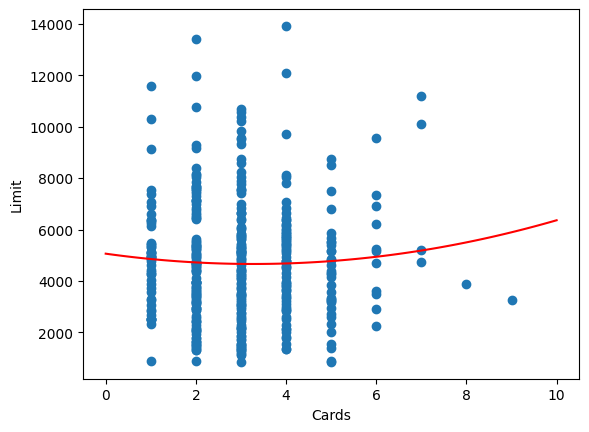

In [104]:
x_linspace = np.linspace(0,10,100).reshape(-1,1)
x_plot_poly = PolynomialFeatures(degree=p_deg).fit_transform(x_linspace)
y_predict = model_poly.predict(x_plot_poly)

plt.scatter(X, y)
plt.plot(x_linspace, y_predict, color="red")
plt.xlabel('Cards')
plt.ylabel('Limit')

Try changing polynomial degree to find out the effect on the model.

# Conclusion
In this lesson, I covered multilinear regression which extends simple regression to multiple predictors. It included estimating coefficients using Einstein's summation convention and matrix algebra. Finally, I extended multilinear regression to the case of polynomial regression and I fit quadratic model to the data.